In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# noise 주기 위해 random
import random

def striker(val:int):
    if val ==0:
        return 0.2
    else:
        vx = striker(val-1)
        return 3.7*vx*(1-vx)+ random.random()*0.02

In [3]:
striker(30)

0.389009005838883

In [4]:
sample_data = np.array([
    [k*0.1 if k not in [10, 20] else 10 for k in range(1,31)],
    [np.sin(k*np.pi/12) if k%5!=0 else -2.5 for k in range(1,31)],
    [striker(k) for k in range(1, 31)],
    [k**0.5 + 2 for k in range(1,31)]
])

In [5]:
sample_data

array([[ 1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
         4.00000000e-01,  5.00000000e-01,  6.00000000e-01,
         7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
         1.00000000e+01,  1.10000000e+00,  1.20000000e+00,
         1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
         1.60000000e+00,  1.70000000e+00,  1.80000000e+00,
         1.90000000e+00,  1.00000000e+01,  2.10000000e+00,
         2.20000000e+00,  2.30000000e+00,  2.40000000e+00,
         2.50000000e+00,  2.60000000e+00,  2.70000000e+00,
         2.80000000e+00,  2.90000000e+00,  3.00000000e+00],
       [ 2.58819045e-01,  5.00000000e-01,  7.07106781e-01,
         8.66025404e-01, -2.50000000e+00,  1.00000000e+00,
         9.65925826e-01,  8.66025404e-01,  7.07106781e-01,
        -2.50000000e+00,  2.58819045e-01,  1.22464680e-16,
        -2.58819045e-01, -5.00000000e-01, -2.50000000e+00,
        -8.66025404e-01, -9.65925826e-01, -1.00000000e+00,
        -9.65925826e-01, -2.50000000e+00, -7.07106781e-

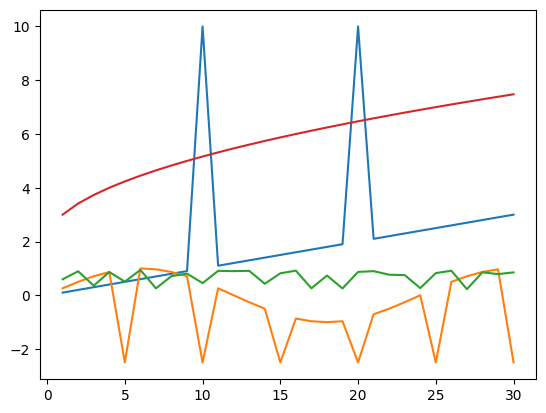

In [6]:
plt.plot(range(1,31), sample_data[0])
plt.plot(range(1,31), sample_data[1])
plt.plot(range(1,31), sample_data[2])
plt.plot(range(1,31), sample_data[3])
plt.show()

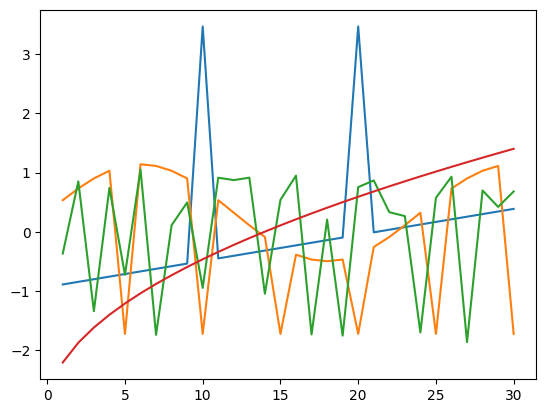

In [7]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(sample_data.T)
new_data = scaler.transform(sample_data.T)
new_data = new_data.T
plt.plot(range(1,31), new_data[0])
plt.plot(range(1,31), new_data[1])
plt.plot(range(1,31), new_data[2])
plt.plot(range(1,31), new_data[3])
plt.show()

In [8]:
# 일시적 데이터 분석하기
from layers.Embed import TemporalConvNet

temp_conv_model_1 = TemporalConvNet(30, [30]*5, 4, 0.01)
temp_conv_model_2 = TemporalConvNet(30, [50]*3, 2, 0.1)
temp_conv_model_3 = TemporalConvNet(30, [60]*4, 2, 0.1)


/home/yohan/anaconda3/envs/itransformer/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [9]:
import torch

sample_torch = torch.from_numpy(np.array([sample_data.T])).float()
new_torch = torch.from_numpy(np.array([new_data.T])).float()

In [10]:
res_sample = temp_conv_model_1(sample_torch).permute(0,2,1)

In [11]:
res_new = temp_conv_model_1(new_torch).permute(0,2,1)

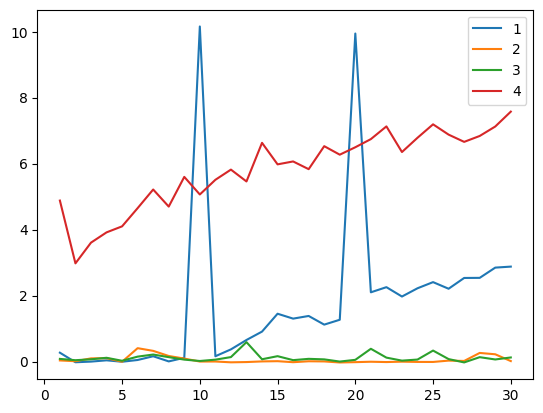

In [12]:
res_sample_numpy = res_sample.detach().numpy()
plt.plot(range(1,31), res_sample_numpy[0,0,:], label='1')
plt.plot(range(1,31), res_sample_numpy[0,1,:], label='2')
plt.plot(range(1,31), res_sample_numpy[0,2,:], label='3')
plt.plot(range(1,31), res_sample_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [13]:
res_new = temp_conv_model_1(new_torch).permute(0,2,1)

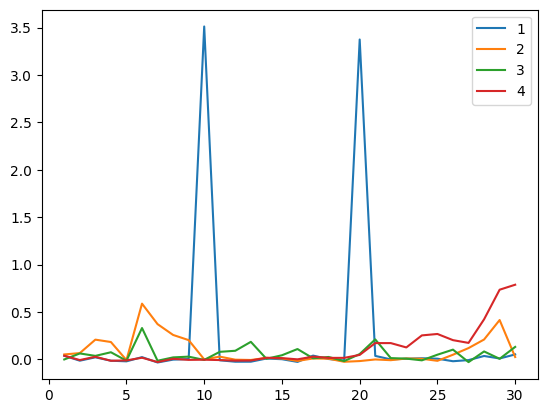

In [14]:
res_new_numpy = res_new.detach().numpy()
plt.plot(range(1,31), res_new_numpy[0,0,:], label='1')
plt.plot(range(1,31), res_new_numpy[0,1,:], label='2')
plt.plot(range(1,31), res_new_numpy[0,2,:], label='3')
plt.plot(range(1,31), res_new_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [55]:
new_torch_shift = torch.from_numpy(np.array([new_data.T])+5).float()

In [56]:
res_new_shift = temp_conv_model_1(new_torch_shift).permute(0,2,1)

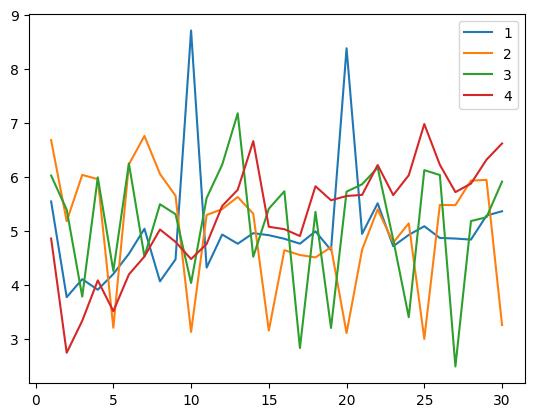

In [57]:
res_new_shift_numpy = res_new_shift.detach().numpy()
plt.plot(range(1,31), res_new_shift_numpy[0,0,:], label='1')
plt.plot(range(1,31), res_new_shift_numpy[0,1,:], label='2')
plt.plot(range(1,31), res_new_shift_numpy[0,2,:], label='3')
plt.plot(range(1,31), res_new_shift_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [15]:
import torch.nn as nn

lin_model = nn.Linear(30, 30)
res_sample_lin = lin_model(sample_torch.permute(0,2,1))

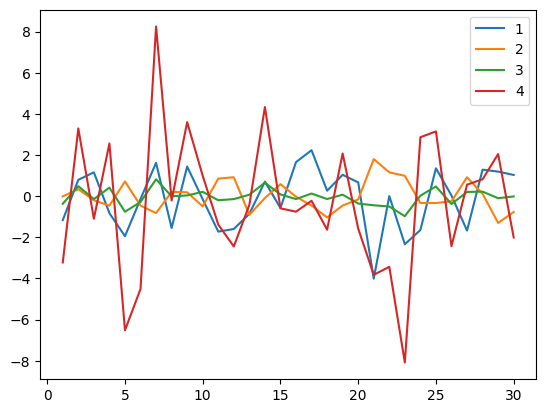

In [16]:
res_sample_lin_numpy = res_sample_lin.detach().numpy()
plt.plot(range(1,31), res_sample_lin_numpy[0,0,:], label='1')
plt.plot(range(1,31), res_sample_lin_numpy[0,1,:], label='2')
plt.plot(range(1,31), res_sample_lin_numpy[0,2,:], label='3')
plt.plot(range(1,31), res_sample_lin_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [31]:
np.mean(res_sample_lin_numpy[0,3,:])

-0.3300393

In [17]:
res_sample_2 = temp_conv_model_2(sample_torch).permute(0,2,1)
res_new_2 = temp_conv_model_2(new_torch).permute(0,2,1)

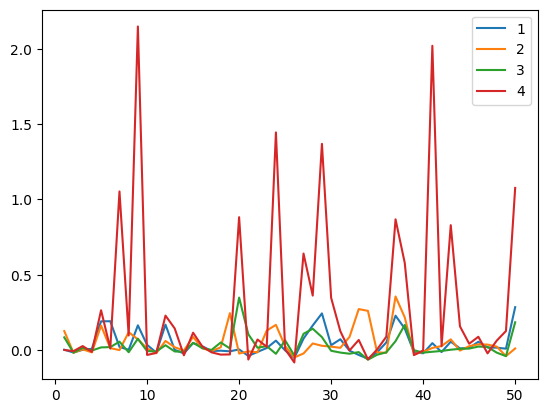

In [18]:
res_sample_2_numpy = res_sample_2.detach().numpy()
plt.plot(range(1,51), res_sample_2_numpy[0,0,:], label='1')
plt.plot(range(1,51), res_sample_2_numpy[0,1,:], label='2')
plt.plot(range(1,51), res_sample_2_numpy[0,2,:], label='3')
plt.plot(range(1,51), res_sample_2_numpy[0,3,:], label='4')
plt.legend()
plt.show()

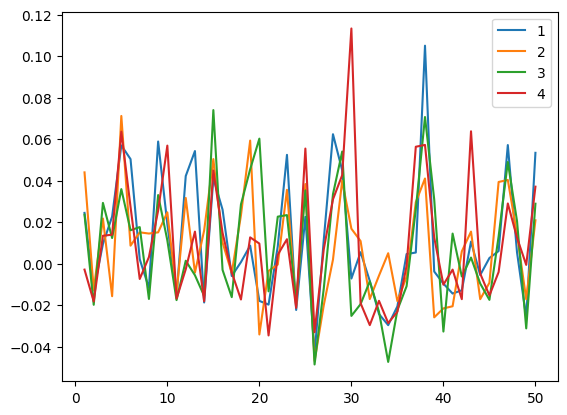

In [26]:
res_new_2_numpy = res_new_2.detach().numpy()
plt.plot(range(1,51), res_new_2_numpy[0,0,:], label='1')
plt.plot(range(1,51), res_new_2_numpy[0,1,:], label='2')
plt.plot(range(1,51), res_new_2_numpy[0,2,:], label='3')
plt.plot(range(1,51), res_new_2_numpy[0,3,:], label='4')
plt.legend()
plt.show()

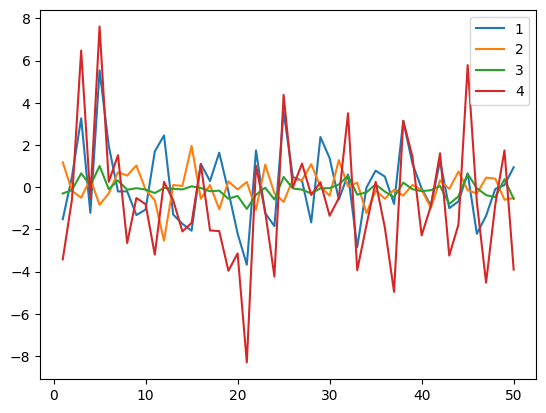

In [19]:
lin_model_1 = nn.Linear(30, 50)
res_sample_lin_1 = lin_model_1(sample_torch.permute(0,2,1))
res_sample_lin_1_numpy = res_sample_lin_1.detach().numpy()
plt.plot(range(1,51), res_sample_lin_1_numpy[0,0,:], label='1')
plt.plot(range(1,51), res_sample_lin_1_numpy[0,1,:], label='2')
plt.plot(range(1,51), res_sample_lin_1_numpy[0,2,:], label='3')
plt.plot(range(1,51), res_sample_lin_1_numpy[0,3,:], label='4')
plt.legend()
plt.show()

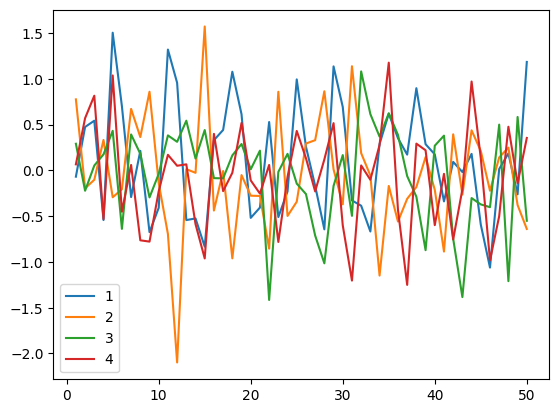

In [32]:
res_new_lin_1 = lin_model_1(new_torch.permute(0,2,1))
res_new_lin_1_numpy = res_new_lin_1.detach().numpy()
plt.plot(range(1,51), res_new_lin_1_numpy[0,0,:], label='1')
plt.plot(range(1,51), res_new_lin_1_numpy[0,1,:], label='2')
plt.plot(range(1,51), res_new_lin_1_numpy[0,2,:], label='3')
plt.plot(range(1,51), res_new_lin_1_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [20]:
res_sample_3 = temp_conv_model_3(sample_torch).permute(0,2,1)
res_new_3 = temp_conv_model_3(new_torch).permute(0,2,1)

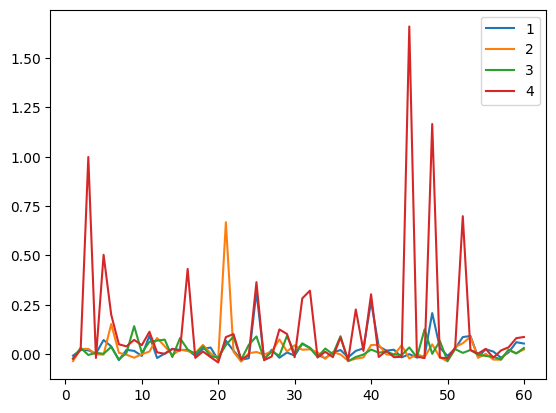

In [21]:
res_sample_3_numpy = res_sample_3.detach().numpy()
plt.plot(range(1,61), res_sample_3_numpy[0,0,:], label='1')
plt.plot(range(1,61), res_sample_3_numpy[0,1,:], label='2')
plt.plot(range(1,61), res_sample_3_numpy[0,2,:], label='3')
plt.plot(range(1,61), res_sample_3_numpy[0,3,:], label='4')
plt.legend()
plt.show()

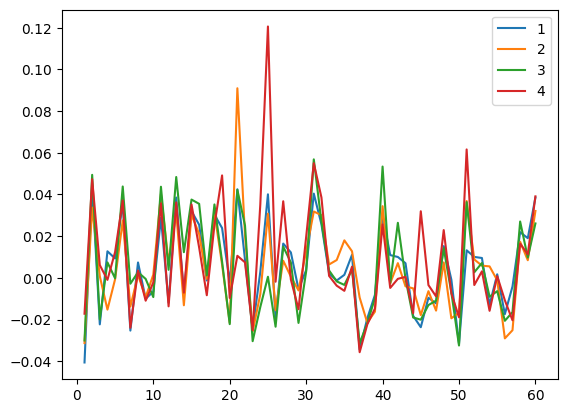

In [33]:
res_new_3_numpy = res_new_3.detach().numpy()
plt.plot(range(1,61), res_new_3_numpy[0,0,:], label='1')
plt.plot(range(1,61), res_new_3_numpy[0,1,:], label='2')
plt.plot(range(1,61), res_new_3_numpy[0,2,:], label='3')
plt.plot(range(1,61), res_new_3_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [22]:
temp_conv_model_4 = TemporalConvNet(30, [30]*3, 5, 0.02)

In [23]:
res_sample_4 = temp_conv_model_4(sample_torch).permute(0,2,1)
res_new_4 = temp_conv_model_4(new_torch).permute(0,2,1)

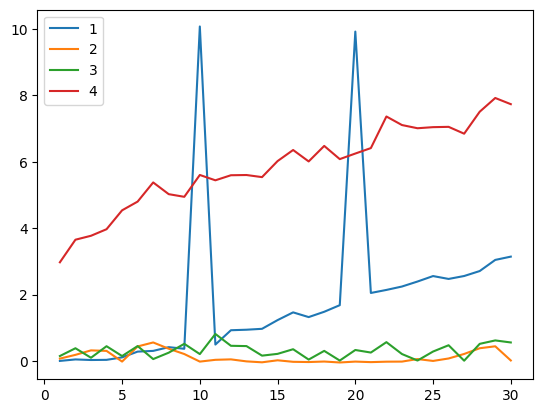

In [24]:
res_sample_4_numpy = res_sample_4.detach().numpy()
plt.plot(range(1,31), res_sample_4_numpy[0,0,:], label='1')
plt.plot(range(1,31), res_sample_4_numpy[0,1,:], label='2')
plt.plot(range(1,31), res_sample_4_numpy[0,2,:], label='3')
plt.plot(range(1,31), res_sample_4_numpy[0,3,:], label='4')
plt.legend()
plt.show()

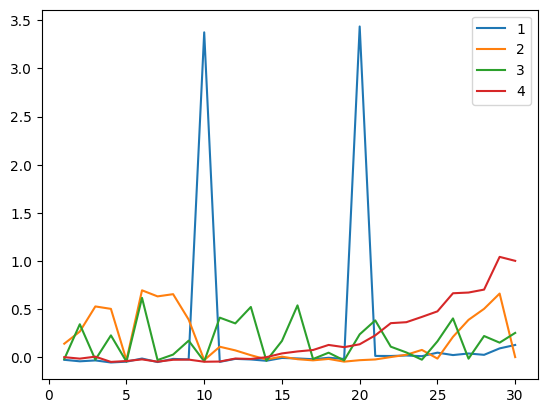

In [25]:
res_new_4_numpy = res_new_4.detach().numpy()
plt.plot(range(1,31), res_new_4_numpy[0,0,:], label='1')
plt.plot(range(1,31), res_new_4_numpy[0,1,:], label='2')
plt.plot(range(1,31), res_new_4_numpy[0,2,:], label='3')
plt.plot(range(1,31), res_new_4_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [34]:
temp_conv_model_5 = TemporalConvNet(30, [30]*2+ [60], 2, 0.05)

In [35]:
res_sample_5 = temp_conv_model_5(sample_torch).permute(0,2,1)
res_new_5 = temp_conv_model_5(new_torch).permute(0,2,1)

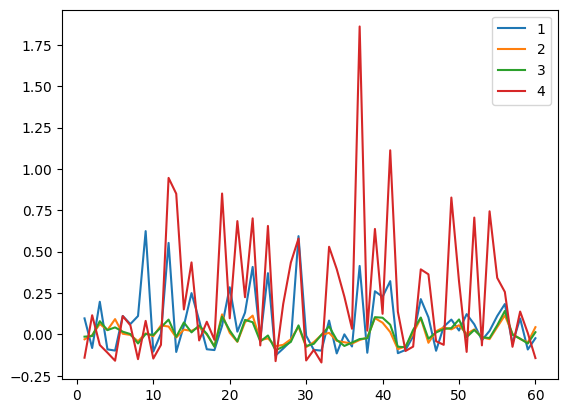

In [36]:
res_sample_5_numpy = res_sample_5.detach().numpy()
plt.plot(range(1,61), res_sample_5_numpy[0,0,:], label='1')
plt.plot(range(1,61), res_sample_5_numpy[0,1,:], label='2')
plt.plot(range(1,61), res_sample_5_numpy[0,2,:], label='3')
plt.plot(range(1,61), res_sample_5_numpy[0,3,:], label='4')
plt.legend()
plt.show()

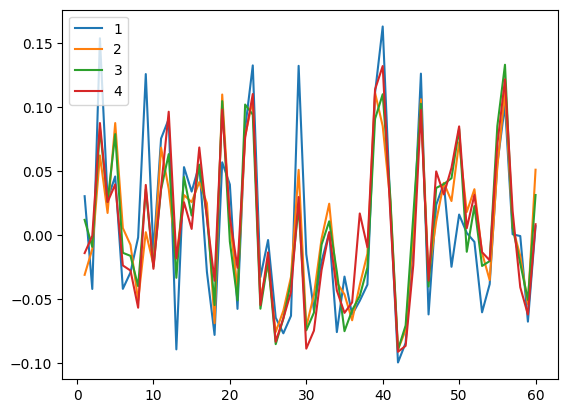

In [37]:
res_new_5_numpy = res_new_5.detach().numpy()
plt.plot(range(1,61), res_new_5_numpy[0,0,:], label='1')
plt.plot(range(1,61), res_new_5_numpy[0,1,:], label='2')
plt.plot(range(1,61), res_new_5_numpy[0,2,:], label='3')
plt.plot(range(1,61), res_new_5_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [39]:
sample_data_permute = sample_data[[1,3,0,2]]
new_data_permute = new_data[[1,3,0,2]]

In [40]:
sample_permute_torch = torch.from_numpy(np.array([sample_data_permute.T])).float()
new_permute_torch = torch.from_numpy(np.array([new_data_permute.T])).float()

In [41]:
res_sample_perm_5 = temp_conv_model_5(sample_permute_torch).permute(0,2,1)
res_new_perm_5 = temp_conv_model_5(new_permute_torch).permute(0,2,1)

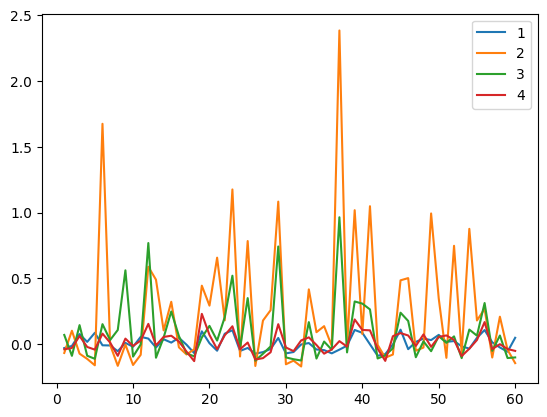

In [42]:
res_sample_perm_5_numpy = res_sample_perm_5.detach().numpy()
plt.plot(range(1,61), res_sample_perm_5_numpy[0,0,:], label='1')
plt.plot(range(1,61), res_sample_perm_5_numpy[0,1,:], label='2')
plt.plot(range(1,61), res_sample_perm_5_numpy[0,2,:], label='3')
plt.plot(range(1,61), res_sample_perm_5_numpy[0,3,:], label='4')
plt.legend()
plt.show()

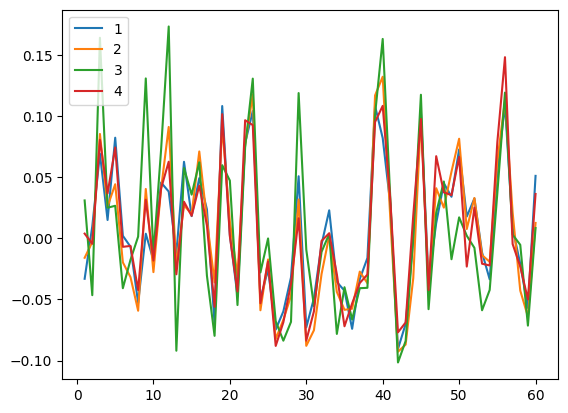

In [43]:
res_new_perm_5_numpy = res_new_perm_5.detach().numpy()
plt.plot(range(1,61), res_new_perm_5_numpy[0,0,:], label='1')
plt.plot(range(1,61), res_new_perm_5_numpy[0,1,:], label='2')
plt.plot(range(1,61), res_new_perm_5_numpy[0,2,:], label='3')
plt.plot(range(1,61), res_new_perm_5_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [44]:
temp_conv_model_6 = TemporalConvNet(30, [60]*2+[30], 2, 0.05)

In [45]:
res_sample_6 = temp_conv_model_6(sample_torch).permute(0,2,1)
res_new_6 = temp_conv_model_6(new_torch).permute(0,2,1)

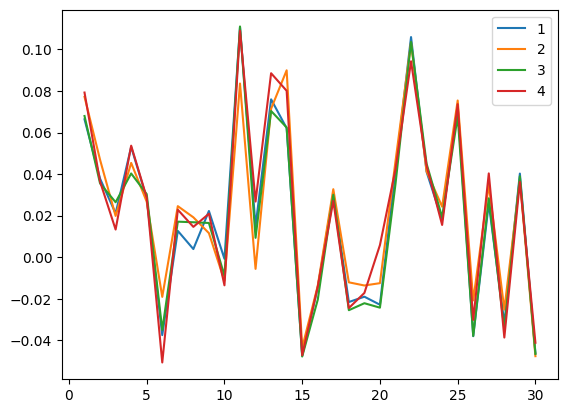

In [47]:
res_sample_6_numpy = res_sample_6.detach().numpy()
plt.plot(range(1,31), res_sample_6_numpy[0,0,:], label='1')
plt.plot(range(1,31), res_sample_6_numpy[0,1,:], label='2')
plt.plot(range(1,31), res_sample_6_numpy[0,2,:], label='3')
plt.plot(range(1,31), res_sample_6_numpy[0,3,:], label='4')
plt.legend()
plt.show()

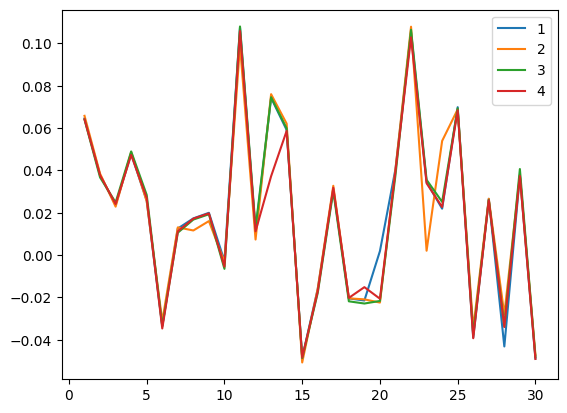

In [48]:
res_new_6_numpy = res_new_6.detach().numpy()
plt.plot(range(1,31), res_new_6_numpy[0,0,:], label='1')
plt.plot(range(1,31), res_new_6_numpy[0,1,:], label='2')
plt.plot(range(1,31), res_new_6_numpy[0,2,:], label='3')
plt.plot(range(1,31), res_new_6_numpy[0,3,:], label='4')
plt.legend()
plt.show()

In [49]:
temp_conv_model_7 = TemporalConvNet(30, [30,45,60], 2, 0.05)

In [50]:
res_sample_7 = temp_conv_model_7(sample_torch).permute(0,2,1)
res_new_7 = temp_conv_model_7(new_torch).permute(0,2,1)

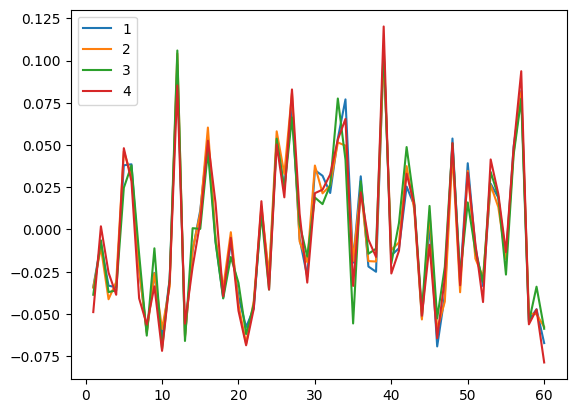

In [52]:
res_sample_7_numpy = res_sample_7.detach().numpy()
plt.plot(range(1,61), res_sample_7_numpy[0,0,:], label='1')
plt.plot(range(1,61), res_sample_7_numpy[0,1,:], label='2')
plt.plot(range(1,61), res_sample_7_numpy[0,2,:], label='3')
plt.plot(range(1,61), res_sample_7_numpy[0,3,:], label='4')
plt.legend()
plt.show()

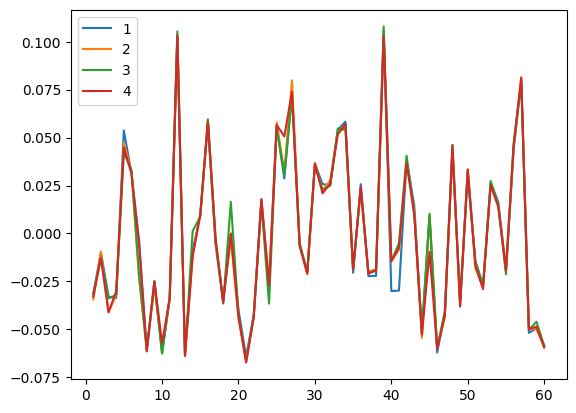

In [54]:
res_new_7_numpy = res_new_7.detach().numpy()
plt.plot(range(1,61), res_new_7_numpy[0,0,:], label='1')
plt.plot(range(1,61), res_new_7_numpy[0,1,:], label='2')
plt.plot(range(1,61), res_new_7_numpy[0,2,:], label='3')
plt.plot(range(1,61), res_new_7_numpy[0,3,:], label='4')
plt.legend()
plt.show()